In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [280]:
mandi_data = pd.read_csv('Deseasonalized_Mandi_Prices.csv')
msp_data = pd.read_csv("Outlier_removed_msp_data.csv")

# We need to compare 3 prices of commodities in APMC/Mandi-
-  Minimum Support Price
-  Raw Modal_Price
-  Deseasonalized Price

# We can adopt 3 measures-
-  Since we have 3 years data for MSP of commodities-
1. We can have an yearly comparison of the average modal,deseasonalized price and msp for different commodities in a particular APMC
2. We can have an yearly comparison of the average modal,deseasonalized price and msp for different APMC's for a particular commodity
3. We can also have a monthly time-series comparison of movements in price in a particular APMC for a particular commodity

# MEASURE 1

In [7]:
msp_data.head()

,commodity,year,Type,msprice
0,sugarcane,2016,Other Crops,230.0
1,sugarcane,2012,Other Crops,170.0
2,sugarcane,2013,Other Crops,210.0
3,sugarcane,2014,Other Crops,220.0
4,sugarcane,2015,Other Crops,230.0


In [22]:
mandi_data.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,Seasonality_Type,Deseasonalized_Price
0,Yeotmal,soybean,2014,September,2162,3063,3379,3225.0,2014-09-01,Yewatmal,Multiplicative,3224.0
1,Yeotmal,soybean,2014,October,10548,2906,3229,3070.0,2014-10-01,Yewatmal,Multiplicative,3068.0
2,Yeotmal,soybean,2014,November,29381,3000,3327,3162.0,2014-11-01,Yewatmal,Multiplicative,3160.0
3,Yeotmal,soybean,2014,December,18921,3014,3300,3163.0,2014-12-01,Yewatmal,Multiplicative,3162.0
4,Yeotmal,soybean,2015,January,19595,3009,3340,3176.0,2015-01-01,Yewatmal,Multiplicative,3174.0


# For proper plotting comparison, we must make sure we have monthly data for the 3 respective years - 2014,2015,2016
-  Selecting commodities from msp_data that have three above mentioned years data
-  Mandi_data already has data for it, so we're fine there

In [18]:
msp_data = msp_data[(msp_data['year']==2014)|(msp_data['year']==2015)|(msp_data['year']==2016)]

In [25]:
#len(msp_data) = 93 ,(originally 155) # significant number of  commodities didn't have data for all the three years
msp_data.head()

,commodity,year,Type,msprice
0,sugarcane,2016,Other Crops,230.0
3,sugarcane,2014,Other Crops,220.0
4,sugarcane,2015,Other Crops,230.0
7,jute_yellow,2014,Other Crops,2400.0
8,jute_yellow,2015,Other Crops,2700.0


In [45]:
# Now, getting the common commodities between our mandi_data and msp_data
s1 = set(mandi_data.commodity.unique())
s2 = set(msp_data.commodity.unique())
s3 = s1.intersection(s2)
s3=list(s3)

In [46]:
# So we have 17 common commodities and hence we can move forward and work on these commodities
s3

['coconut',
 'maize',
 'wheat(husked)',
 'soybean',
 'sorgum(jawar)',
 'split black gram',
 'paddy-unhusked',
 'pigeon pea (tur)',
 'rice(paddy-hus)',
 'sunflower',
 'spilt gerrn gram',
 'bajri',
 'wheat(unhusked)',
 'safflower',
 'mustard',
 'sesamum',
 'gr.nut kernels']

# We now create a new dataframe that shall have the data for any APMC, for any one of the above commodities
-  We create 6 new columns where we take prices(raw and deseasonalized) for three years - 2014,15,16
-  then we add values to the msp colummn based on the commodity and year values

In [170]:
uniq_pairs = mandi_data.groupby(['APMC','commodity']).size().reset_index()
uniq_pairs.drop(columns=[0],inplace=True)
uniq_pairs = uniq_pairs[(uniq_pairs['commodity'].isin(s3))]
uniq_pairs.reset_index(drop=True,inplace=True)
uniq_pairs.describe()

,APMC,commodity
count,356,356
unique,121,17
top,Nandura,wheat(husked)
freq,7,72


In [171]:
# Adding columns to this new dataframe
uniq_pairs = uniq_pairs.assign(raw_2014=np.nan,raw_2015=np.nan,raw_2016=np.nan,
                               des_2014=np.nan,des_2015=np.nan,des_2016=np.nan,
                               msp_2014=np.nan,msp_2015=np.nan,msp_2016=np.nan) 

In [172]:
uniq_pairs.head()

,APMC,commodity,raw_2014,raw_2015,raw_2016,des_2014,des_2015,des_2016,msp_2014,msp_2015,msp_2016
0,Aamgaon,paddy-unhusked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akhadabalapur,soybean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akluj,maize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Akole,bajri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Akole,paddy-unhusked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
for i,row in uniq_pairs.iterrows():
    df = mandi_data[(mandi_data['APMC'] == row.APMC) & (mandi_data['commodity'] == row.commodity)]
    uniq_pairs.loc[i,'raw_2014'] = df[df['Year']==2014]['modal_price'].mean()
    uniq_pairs.loc[i,'raw_2015'] = df[df['Year']==2015]['modal_price'].mean()
    uniq_pairs.loc[i,'raw_2016'] = df[df['Year']==2016]['modal_price'].mean()
    uniq_pairs.loc[i,'des_2014'] = df[df['Year']==2014]['Deseasonalized_Price'].mean()
    uniq_pairs.loc[i,'des_2015'] = df[df['Year']==2015]['Deseasonalized_Price'].mean()
    uniq_pairs.loc[i,'des_2016'] = df[df['Year']==2016]['Deseasonalized_Price'].mean()
    df1 = msp_data[msp_data['commodity']== row.commodity]
    uniq_pairs.loc[i,'msp_2014'] = df1[df1['year']==2014].iloc[0,3]
    uniq_pairs.loc[i,'msp_2015'] = df1[df1['year']==2015].iloc[0,3]
    uniq_pairs.loc[i,'msp_2016'] = df1[df1['year']==2016].iloc[0,3]

In [237]:
uniq_pairs.head()

,APMC,commodity,raw_2014,raw_2015,raw_2016,des_2014,des_2015,des_2016,msp_2014,msp_2015,msp_2016
0,Aamgaon,paddy-unhusked,1609.75,1495.000000,1588.545455,1605.00,1494.333333,1589.363636,1360.0,1410.0,1470.0
1,Akhadabalapur,soybean,3188.25,3284.833333,3422.454545,3194.50,3284.166667,3419.272727,2560.0,2600.0,2660.0
2,Akluj,maize,1259.25,1386.333333,1569.375000,1257.00,1385.666667,1569.500000,1310.0,1325.0,1347.5
3,Akole,bajri,1580.75,1552.000000,1628.272727,1580.00,1551.666667,1628.090909,1250.0,1275.0,1330.0
4,Akole,paddy-unhusked,1650.00,1596.583333,1657.454545,1648.25,1594.916667,1655.818182,1360.0,1410.0,1470.0


In [ ]:
# We have finally prepeared the data and it's ready to plot

In [217]:
df = uniq_pairs[(uniq_pairs['commodity']=='pigeon pea (tur)')]
df = df.dropna(how='any')
df.head()

,APMC,commodity,raw_2014,raw_2015,raw_2016,des_2014,des_2015,des_2016,msp_2014,msp_2015,msp_2016
7,Amarawati,pigeon pea (tur),4931.00,7737.416667,7841.727273,4930.666667,7737.083333,7832.727273,4350.0,4425.0,4612.5
11,Ambejogai,pigeon pea (tur),4350.50,6776.250000,7185.000000,4325.750000,6775.916667,7193.545455,4350.0,4425.0,4612.5
13,Anajngaon Surji,pigeon pea (tur),4799.25,7143.916667,7437.181818,4802.250000,7143.583333,7435.636364,4350.0,4425.0,4612.5
20,Ausa,pigeon pea (tur),4727.50,7571.833333,7583.909091,4725.750000,7570.166667,7582.272727,4350.0,4425.0,4612.5
33,Barshi,pigeon pea (tur),4273.75,6677.250000,7156.272727,4272.000000,6675.583333,7154.636364,4350.0,4425.0,4612.5


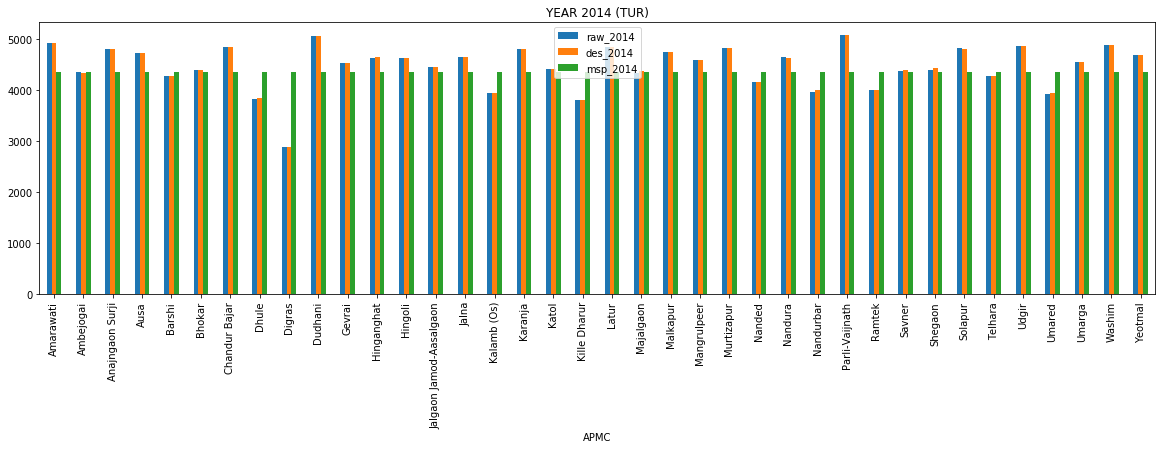

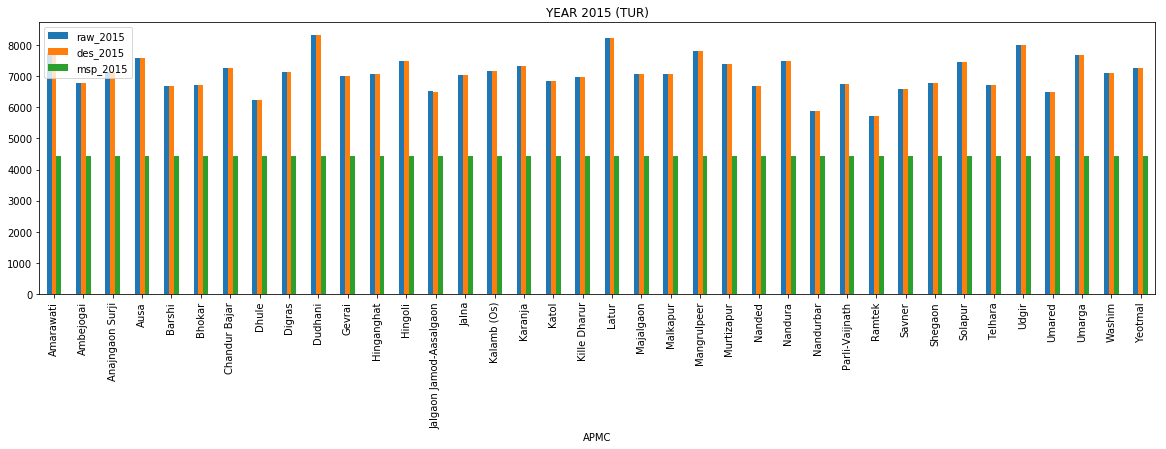

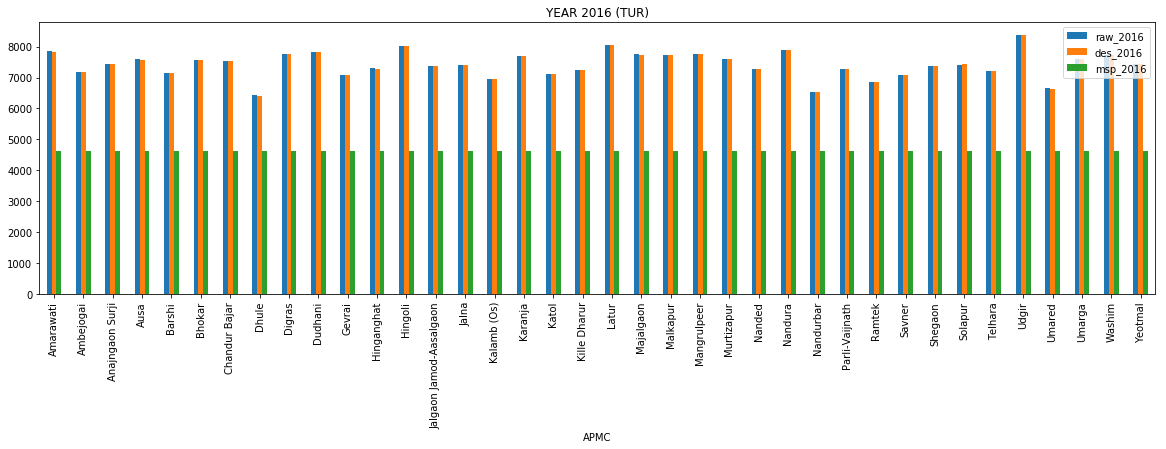

In [293]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

df.plot(x='APMC',y=['raw_2014','des_2014','msp_2014'],kind = 'bar',title = 'YEAR 2014 (TUR)')
plt.savefig('pc1.png',dpi=200)
df.plot(x='APMC',y=['raw_2015','des_2015','msp_2015'],kind = 'bar',title = 'YEAR 2015 (TUR)')
plt.savefig('pc2.png',dpi=200)
df.plot(x='APMC',y=['raw_2016','des_2016','msp_2016'],kind = 'bar',title = 'YEAR 2016 (TUR)')
plt.savefig('pc3.png',dpi=200)

# Observations-
-  Some APMC's have prices beloew the Minimum support price in the YEAR 2014
-  This indicates price irregulation or pricing anomaly due to supply-demand issue
-  Also, some APMC's have prices much higher than the MSP, which may be a result of poor regulation or transportation issues  
-  For, the year 2015 and 2016, prices for TUR have been immensely higher than MSP

# Changing the analysis,for a different view of the data
-  We now look at all the commodities at a particular APMC/Mandi

In [234]:
df1 = uniq_pairs[(uniq_pairs['APMC']=='Barshi')]
df1 = df1.dropna(how='any')
df1.head()

,APMC,commodity,raw_2014,raw_2015,raw_2016,des_2014,des_2015,des_2016,msp_2014,msp_2015,msp_2016
30,Barshi,bajri,1505.00,1454.000000,1621.636364,1501.0,1453.666667,1622.636364,1250.0,1275.0,1330.0
31,Barshi,maize,1181.25,1351.416667,1535.636364,1173.0,1350.750000,1537.727273,1310.0,1325.0,1347.5
32,Barshi,paddy-unhusked,1460.75,1459.833333,1739.727273,1461.0,1459.166667,1738.727273,1360.0,1410.0,1470.0
33,Barshi,pigeon pea (tur),4273.75,6677.250000,7156.272727,4272.0,6675.583333,7154.636364,4350.0,4425.0,4612.5
34,Barshi,sorgum(jawar),2028.00,2073.166667,2191.818182,2026.5,2071.833333,2190.545455,1550.0,1590.0,1650.0


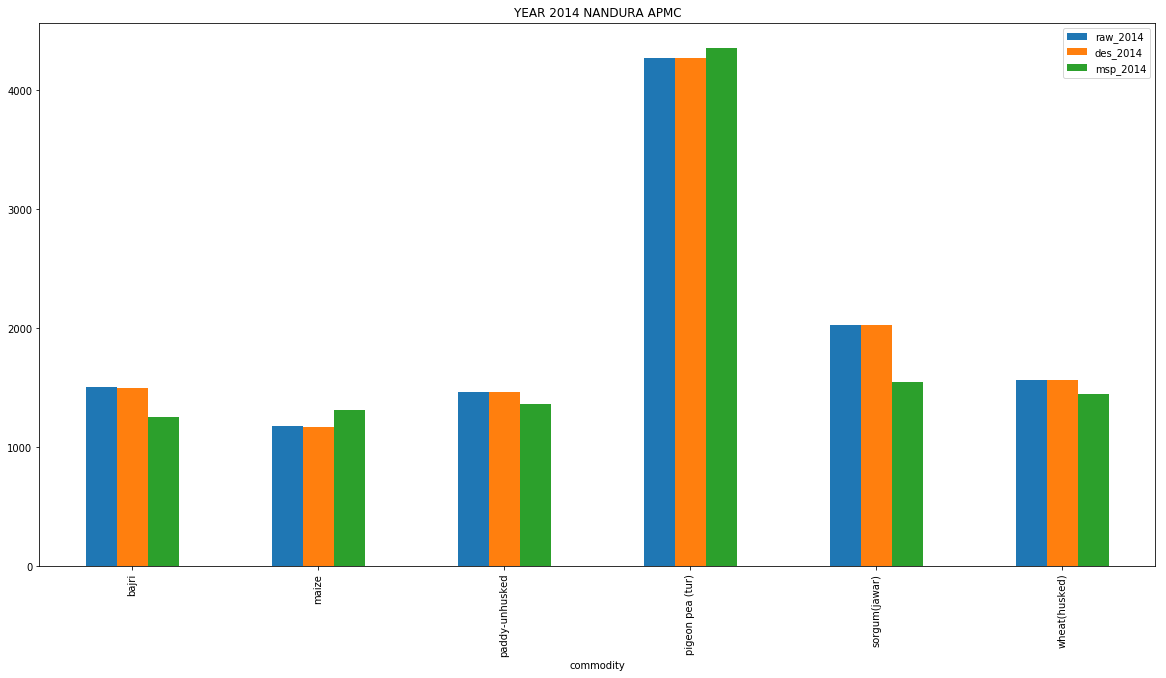

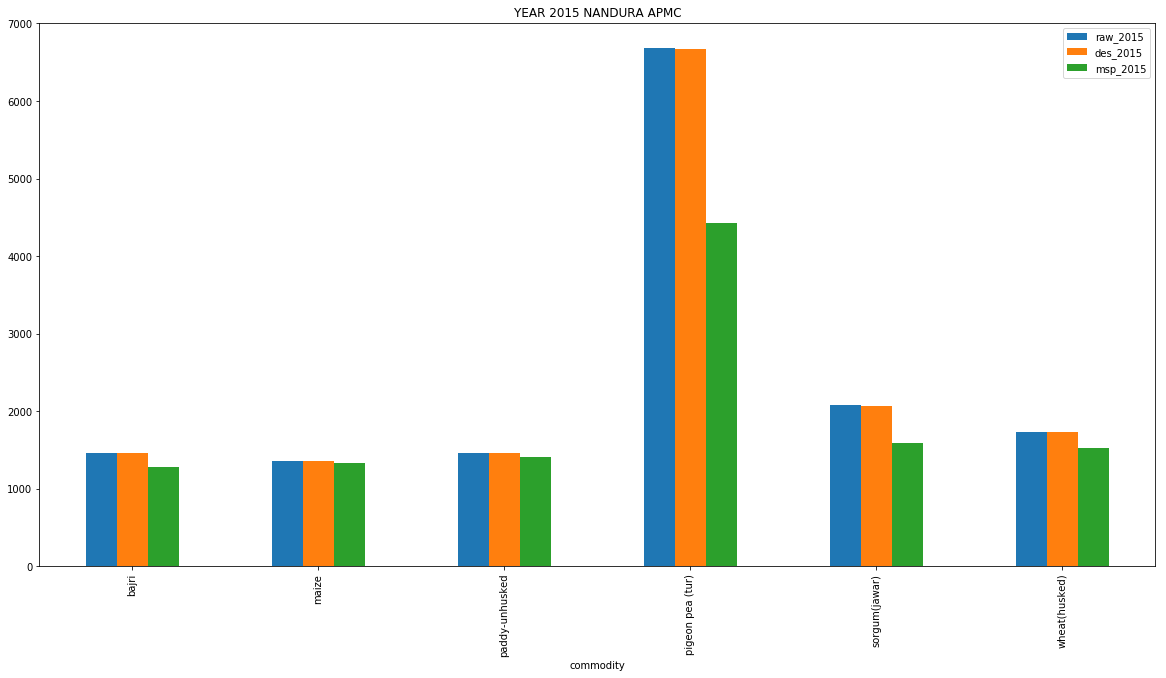

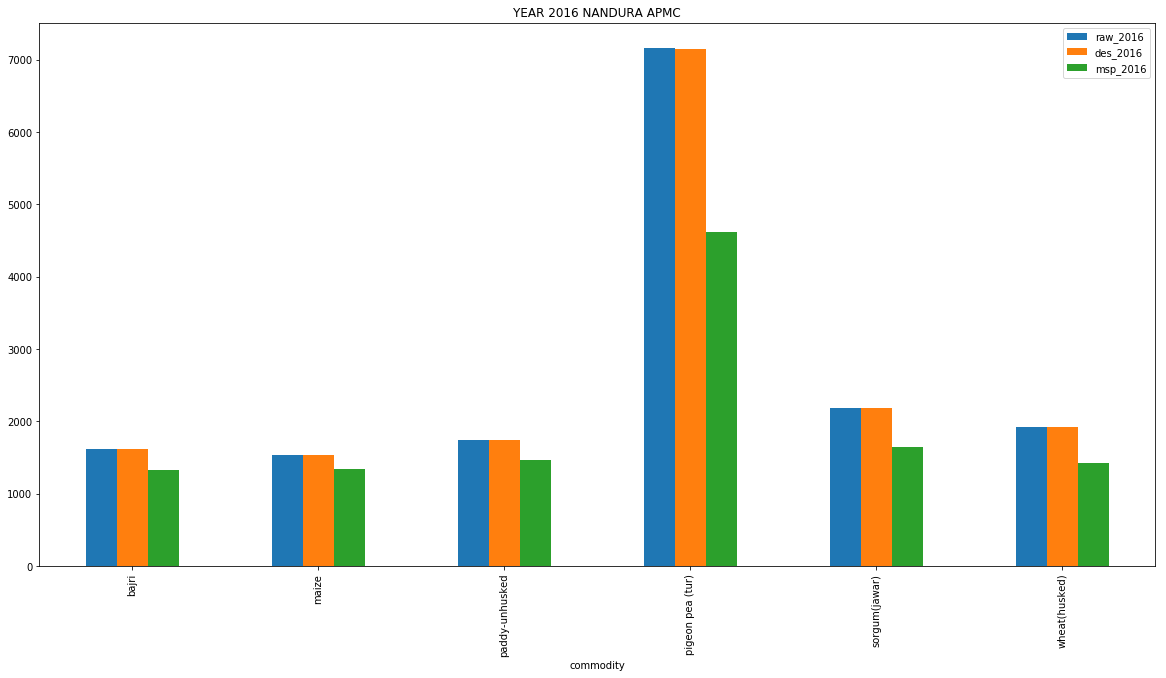

In [294]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

df1.plot(x='commodity',y=['raw_2014','des_2014','msp_2014'],kind = 'bar',title = 'YEAR 2014 NANDURA APMC')
plt.savefig('pc4.png',dpi=200)
df1.plot(x='commodity',y=['raw_2015','des_2015','msp_2015'],kind = 'bar',title = 'YEAR 2015 NANDURA APMC')
plt.savefig('pc5.png',dpi=200)
df1.plot(x='commodity',y=['raw_2016','des_2016','msp_2016'],kind = 'bar',title = 'YEAR 2016 NANDURA APMC')
plt.savefig('pc6.png',dpi=200)

# Observations- 
-  We may be able to find corrupt APMC/Mandi's with these plots for all the Mandi's
-  We can observe prices both above and below the Minimum support Price and this accounts for complex logistic management of commodities

# Let's look at the Second Measure, Prices on the timeline ,and see if we are able to derive any concrete result from it

In [268]:
df3 = mandi_data[(mandi_data['APMC']=='Aamgaon')&(mandi_data['commodity']=='paddy-unhusked')]
df3.reset_index(inplace=True,drop=True)
df3.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,Seasonality_Type,Deseasonalized_Price
0,Aamgaon,paddy-unhusked,2014,September,2779,1645,1843,1744.0,2014-09-01,Gondiya,Additive,1727.0
1,Aamgaon,paddy-unhusked,2014,October,2195,1591,1749,1670.0,2014-10-01,Gondiya,Additive,1671.0
2,Aamgaon,paddy-unhusked,2014,November,10153,1438,1577,1507.0,2014-11-01,Gondiya,Additive,1521.0
3,Aamgaon,paddy-unhusked,2014,December,14608,1481,1554,1518.0,2014-12-01,Gondiya,Additive,1501.0
4,Aamgaon,paddy-unhusked,2015,January,16775,1505,1562,1533.0,2015-01-01,Gondiya,Additive,1534.0


In [269]:
for i in range(len(df3)):
    if df3.loc[i,'Year'] ==2014:
        df3.loc[i,'msprice'] = msp_data[(msp_data['commodity']=='paddy-unhusked')&(msp_data['year']==2014)].iloc[0,3]
    elif df3.loc[i,'Year'] ==2015:
        df3.loc[i,'msprice'] = msp_data[(msp_data['commodity']=='paddy-unhusked')&(msp_data['year']==2015)].iloc[0,3]
    else:
        df3.loc[i,'msprice'] = msp_data[(msp_data['commodity']=='paddy-unhusked')&(msp_data['year']==2016)].iloc[0,3]
    

# We can also create a fucntion but for simplicity, we take an example

In [270]:
df3.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,Seasonality_Type,Deseasonalized_Price,msprice
0,Aamgaon,paddy-unhusked,2014,September,2779,1645,1843,1744.0,2014-09-01,Gondiya,Additive,1727.0,1360.0
1,Aamgaon,paddy-unhusked,2014,October,2195,1591,1749,1670.0,2014-10-01,Gondiya,Additive,1671.0,1360.0
2,Aamgaon,paddy-unhusked,2014,November,10153,1438,1577,1507.0,2014-11-01,Gondiya,Additive,1521.0,1360.0
3,Aamgaon,paddy-unhusked,2014,December,14608,1481,1554,1518.0,2014-12-01,Gondiya,Additive,1501.0,1360.0
4,Aamgaon,paddy-unhusked,2015,January,16775,1505,1562,1533.0,2015-01-01,Gondiya,Additive,1534.0,1410.0


# Let's plot now 

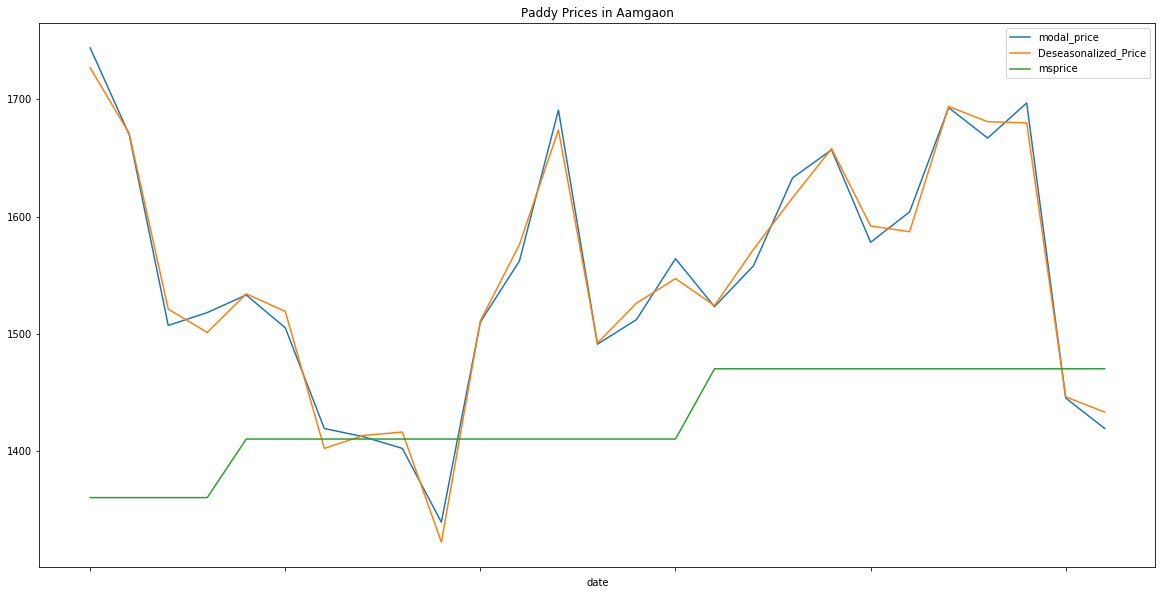

In [295]:
rcParams['figure.figsize'] = 20, 10
df3.plot(x='date',y=['modal_price','Deseasonalized_Price','msprice'],kind = 'line', title= 'Paddy Prices in Aamgaon')
plt.savefig('pc7.png',dpi=200)

In [287]:
df4 = mandi_data[(mandi_data['APMC']=='Akhadabalapur')&(mandi_data['commodity']=='soybean')]
df4.reset_index(inplace=True,drop=True)
df4.head()

,APMC,commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,Seasonality_Type,Deseasonalized_Price
0,Akhadabalapur,soybean,2014,September,311,3627,3755,3677.0,2014-09-01,Hingoli,Additive,3704.0
1,Akhadabalapur,soybean,2014,October,1511,2671,2936,2811.0,2014-10-01,Hingoli,Additive,2841.0
2,Akhadabalapur,soybean,2014,November,1932,3065,3255,3160.0,2014-11-01,Hingoli,Additive,3101.0
3,Akhadabalapur,soybean,2014,December,3600,3026,3202,3105.0,2014-12-01,Hingoli,Additive,3132.0
4,Akhadabalapur,soybean,2015,January,1038,3055,3236,3159.0,2015-01-01,Hingoli,Additive,3189.0


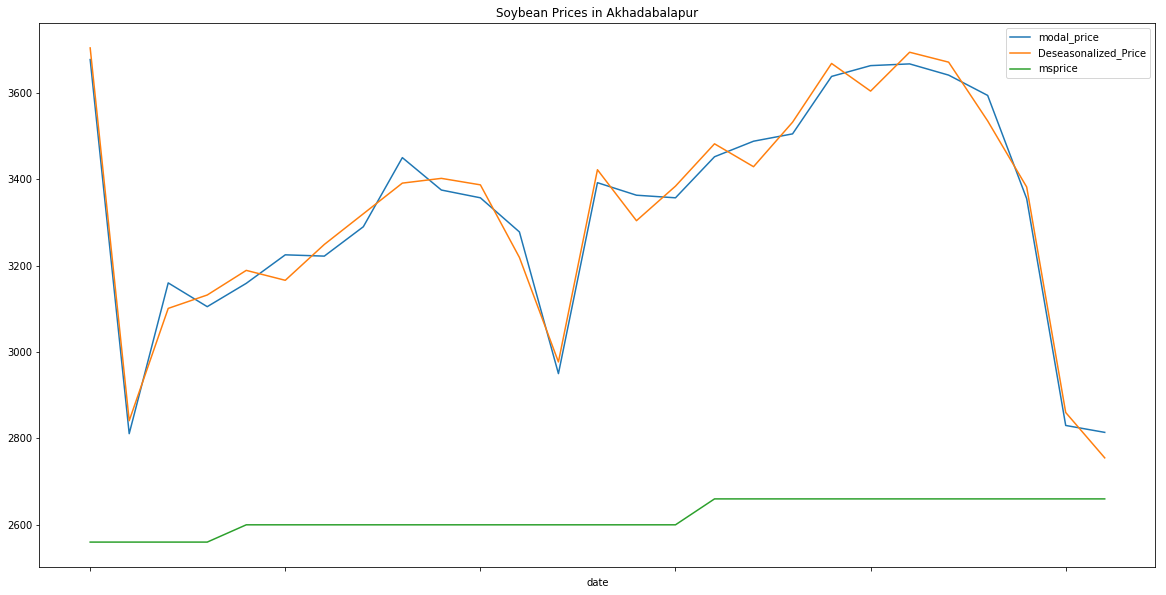

In [296]:
for i in range(len(df4)):
    if df4.loc[i,'Year'] ==2014:
        df4.loc[i,'msprice'] = msp_data[(msp_data['commodity']=='soybean')&(msp_data['year']==2014)].iloc[0,3]
    elif df4.loc[i,'Year'] ==2015:
        df4.loc[i,'msprice'] = msp_data[(msp_data['commodity']=='soybean')&(msp_data['year']==2015)].iloc[0,3]
    else:
        df4.loc[i,'msprice'] = msp_data[(msp_data['commodity']=='soybean')&(msp_data['year']==2016)].iloc[0,3]
df4.plot(x='date',y=['modal_price','Deseasonalized_Price','msprice'],kind = 'line', title= 'Soybean Prices in Akhadabalapur')
plt.savefig('pc8.png',dpi=200)

# Observations- 
-  We find that some commodities are being sold much above the Minimum Support Price and some move up and down across the MSP
-  We also observe that there isn't very high seasonal variation in prices that is evident with the similarity of the curves